##**Cluster with GMM**  <br>
Bhavya Hegde <br>
SJSU ID: 016656029 <br>
Team Name: Code wizards

##**Business objective**
To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.


##**Import all the necessary libraries**

In [118]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [119]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [120]:
id="18cvJIqzfhTSrV53TJZruhYEVNO47b_b5"

In [121]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Data Narrative**

Main dataset is downloaded from redfin and uploaded here  : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

Scrapped data for <br>
walk score is from :  https://www.walkscore.com/ <br>
crime rate , property crime: https://247wallst.com/state/crime-in-california/ <br>
School rating : https://www.niche.com/places-to-live/z/95134/ <br>

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B) <br>

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE**: This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE**: The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE**: This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS**: The specific address of the property, providing detailed location information.

**CITY**: The city where the property is located.

STATE OR PROVINCE: The state or province where the property is situated.

**ZIP_CODE**: The postal code of the property's location, which can be used for regional analysis.

**PRICE**: The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS**: The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS**: The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE**: The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#**: The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE**: A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED**: This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE**: These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE**: A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME**: This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME**: A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING**: This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children


In [122]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final.csv')
data=pd.read_csv("RF_Housingdata_final.csv")
data.shape
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038260,N,Y,37.835305,-122.221226,30,6421,7692,582.0
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0


## Data Preparation
Dropping columns which are not important for the analysis

In [123]:
data = data.drop(columns=['SALE TYPE', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'FAVORITE', 'INTERESTED', 'MLS#'])

In [124]:
data.shape

(4042, 26)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOLD DATE                   0 non-null      float64
 1   PROPERTY TYPE               4042 non-null   object 
 2   ADDRESS                     4031 non-null   object 
 3   CITY                        4042 non-null   object 
 4   STATE OR PROVINCE           4042 non-null   object 
 5   ZIP_CODE                    4042 non-null   int64  
 6   PRICE                       4042 non-null   int64  
 7   BEDS                        3901 non-null   float64
 8   BATHS                       3807 non-null   float64
 9   LOCATION                    4039 non-null   object 
 10  SQUARE FEET                 3854 non-null   float64
 11  LOT SIZE                    3173 non-null   float64
 12  YEAR BUILT                  3672 non-null   float64
 13  DAYS ON MARKET              3895 

array([[<Axes: title={'center': 'SOLD DATE'}>,
        <Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATHS'}>,
        <Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>],
       [<Axes: title={'center': 'DAYS ON MARKET'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>,
        <Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>,
        <Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>],
       [<Axes: title={'center': 'SCHOOL_RANKING'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

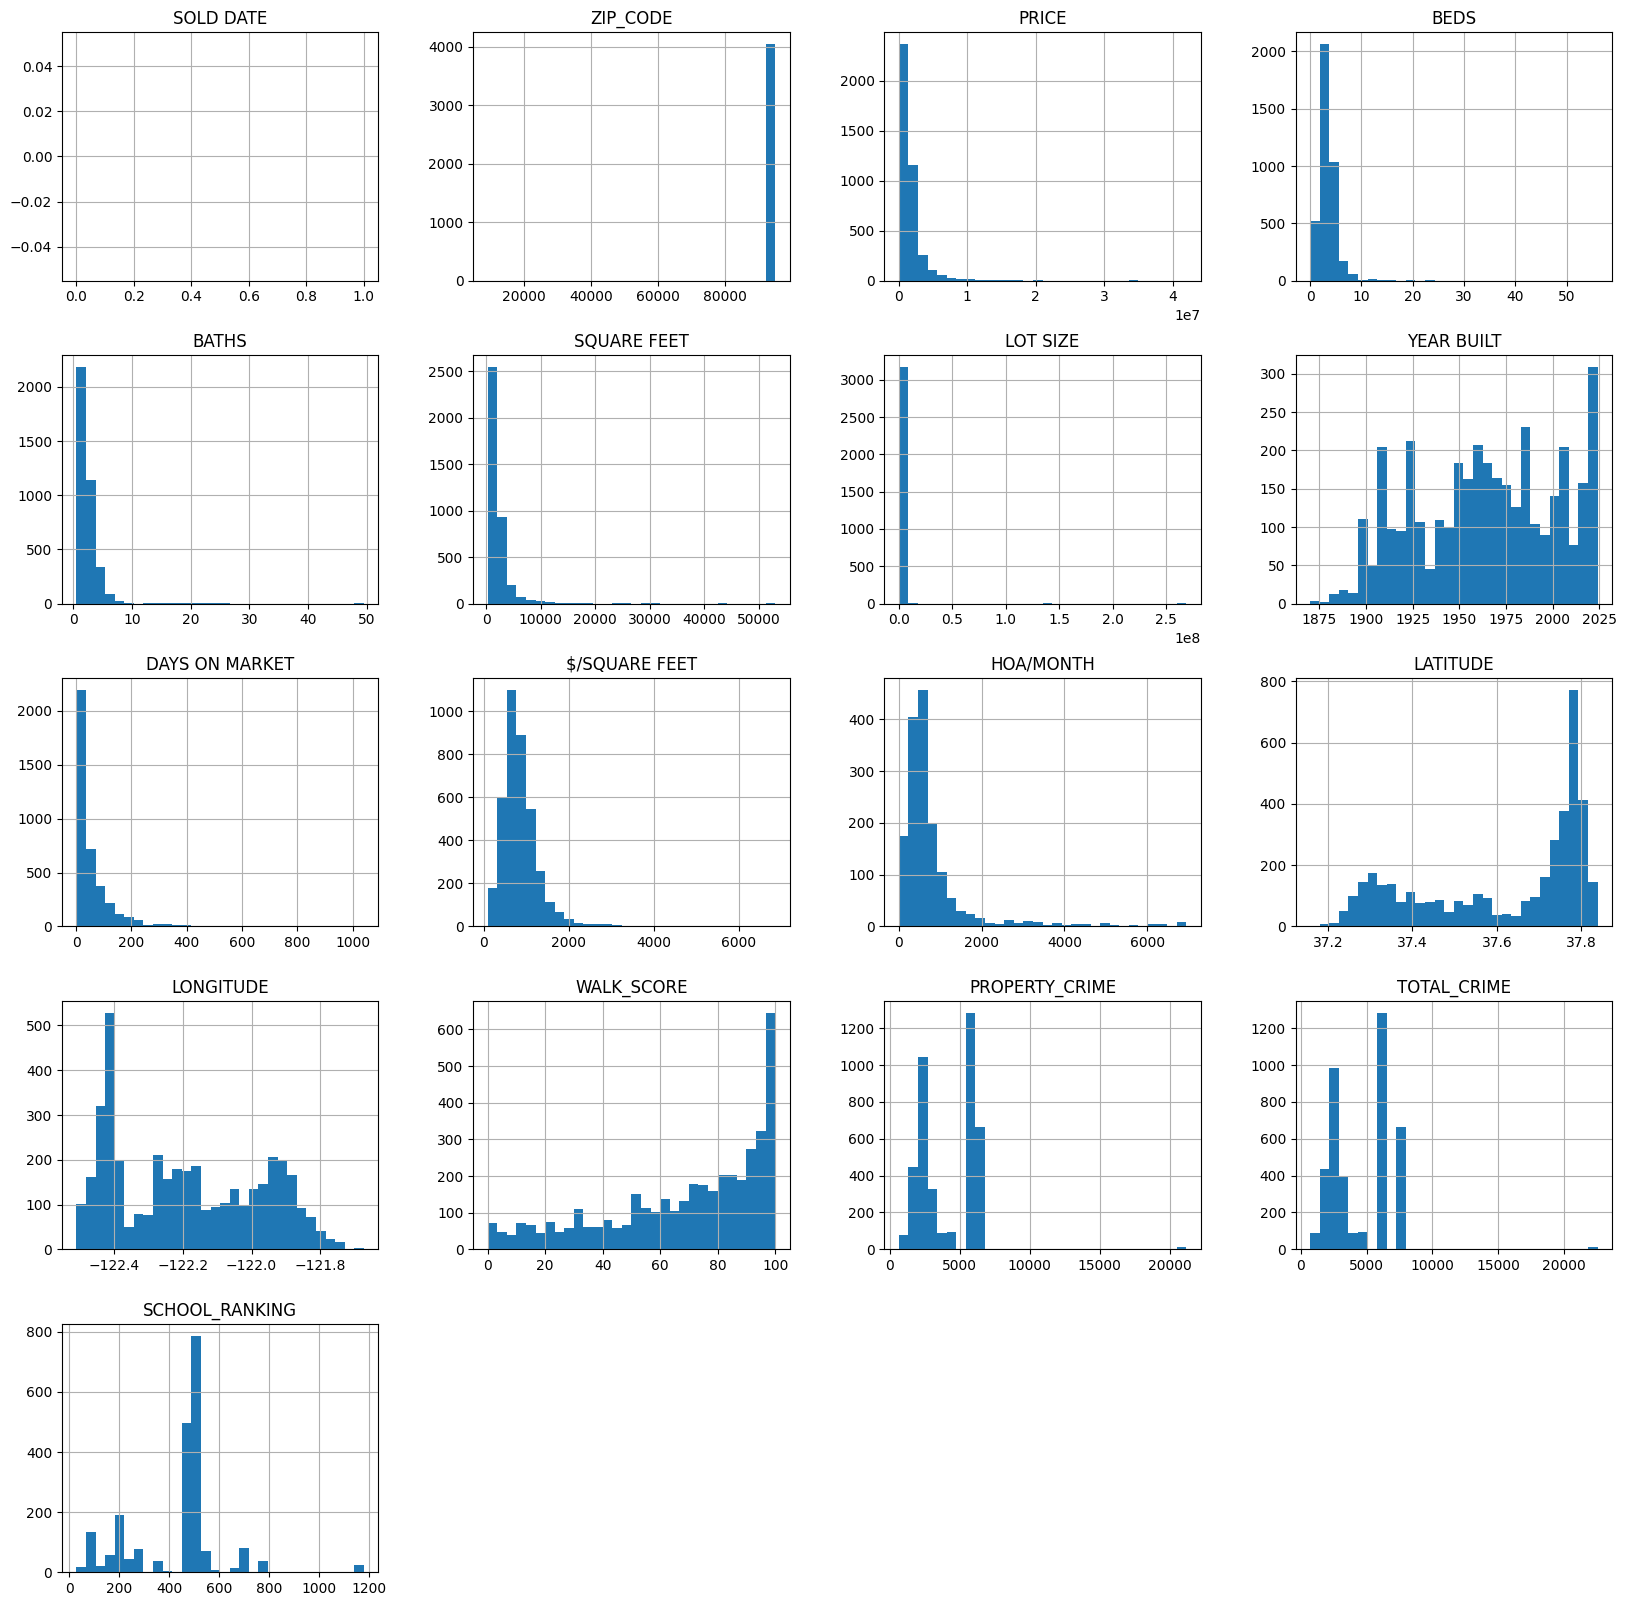

In [126]:
data.hist(bins=30,figsize=[20,20])

Finding the missing count for the data

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

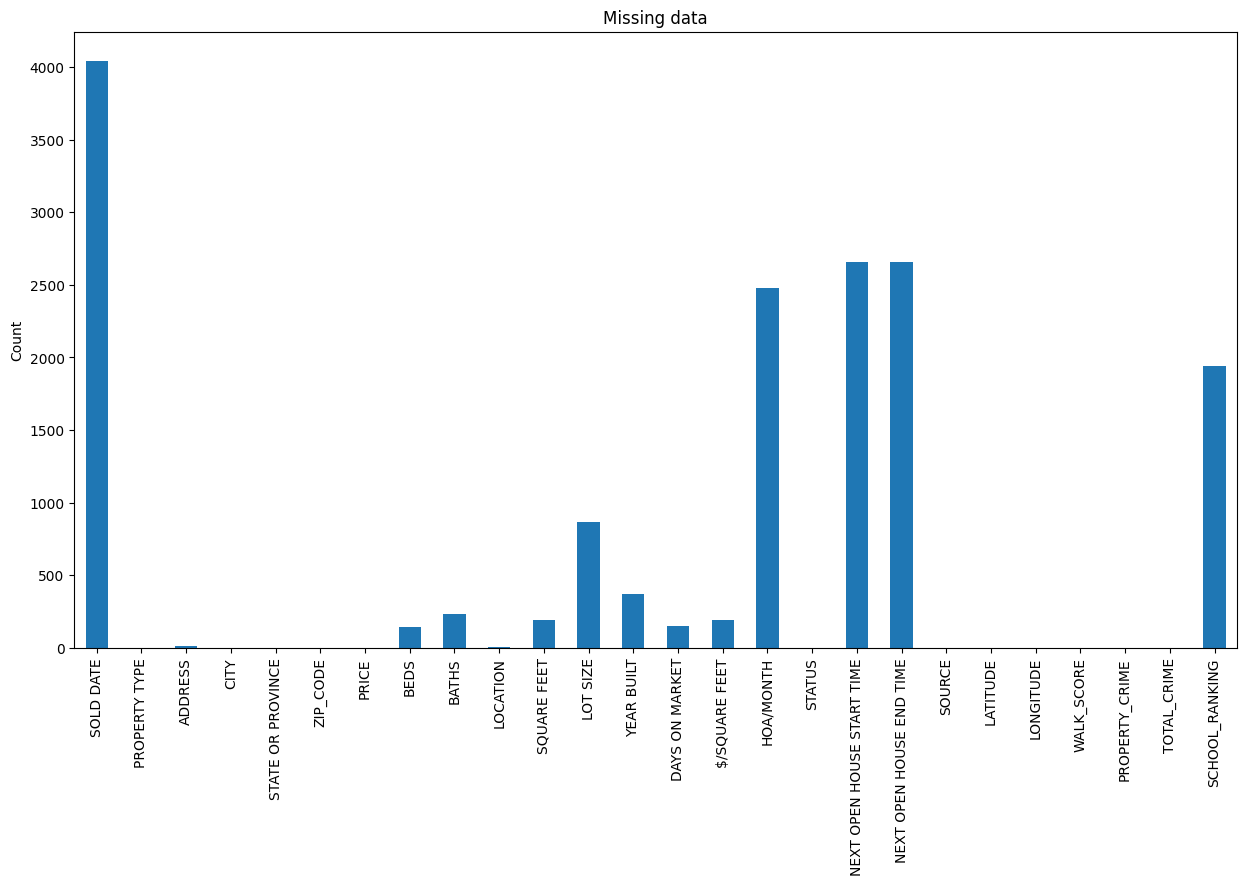

In [127]:
# Display NULL data value using heatmap
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

Finding duplicated values in the data

In [128]:
data.duplicated().any()

True

dropping duplicate values

In [129]:
data = data.drop_duplicates()

In [130]:
data.shape

(3886, 26)

Ensuring we dont have any duplicated value after dropping the duplicated values

In [131]:
data.duplicated().any()

False

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOLD DATE                   0 non-null      float64
 1   PROPERTY TYPE               3886 non-null   object 
 2   ADDRESS                     3875 non-null   object 
 3   CITY                        3886 non-null   object 
 4   STATE OR PROVINCE           3886 non-null   object 
 5   ZIP_CODE                    3886 non-null   int64  
 6   PRICE                       3886 non-null   int64  
 7   BEDS                        3756 non-null   float64
 8   BATHS                       3662 non-null   float64
 9   LOCATION                    3883 non-null   object 
 10  SQUARE FEET                 3709 non-null   float64
 11  LOT SIZE                    3039 non-null   float64
 12  YEAR BUILT                  3527 non-null   float64
 13  DAYS ON MARKET              3740 

Replace missing values with the respective median values

In [133]:
# Calculate the median values for the specified columns
median_values = {
    'BEDS': data['BEDS'].median(),
    'BATHS':data['BATHS'].median(),
    'SQUARE FEET': data['SQUARE FEET'].median(),
    'LOT SIZE': data['LOT SIZE'].median(),
    '$/SQUARE FEET': data['$/SQUARE FEET'].median(),
    'HOA/MONTH': data['HOA/MONTH'].median(),

}

# Replace missing values with the respective median values
for column, median in median_values.items():
    data[column].fillna(median, inplace=True)

# Print the number of missing values in each column
print(data.isnull().sum())


SOLD DATE                     3886
PROPERTY TYPE                    0
ADDRESS                         11
CITY                             0
STATE OR PROVINCE                0
ZIP_CODE                         0
PRICE                            0
BEDS                             0
BATHS                            0
LOCATION                         3
SQUARE FEET                      0
LOT SIZE                         0
YEAR BUILT                     359
DAYS ON MARKET                 146
$/SQUARE FEET                    0
HOA/MONTH                        0
STATUS                           0
NEXT OPEN HOUSE START TIME    2572
NEXT OPEN HOUSE END TIME      2572
SOURCE                           0
LATITUDE                         0
LONGITUDE                        0
WALK_SCORE                       0
PROPERTY_CRIME                   0
TOTAL_CRIME                      0
SCHOOL_RANKING                1800
dtype: int64


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOLD DATE                   0 non-null      float64
 1   PROPERTY TYPE               3886 non-null   object 
 2   ADDRESS                     3875 non-null   object 
 3   CITY                        3886 non-null   object 
 4   STATE OR PROVINCE           3886 non-null   object 
 5   ZIP_CODE                    3886 non-null   int64  
 6   PRICE                       3886 non-null   int64  
 7   BEDS                        3886 non-null   float64
 8   BATHS                       3886 non-null   float64
 9   LOCATION                    3883 non-null   object 
 10  SQUARE FEET                 3886 non-null   float64
 11  LOT SIZE                    3886 non-null   float64
 12  YEAR BUILT                  3527 non-null   float64
 13  DAYS ON MARKET              3740 

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

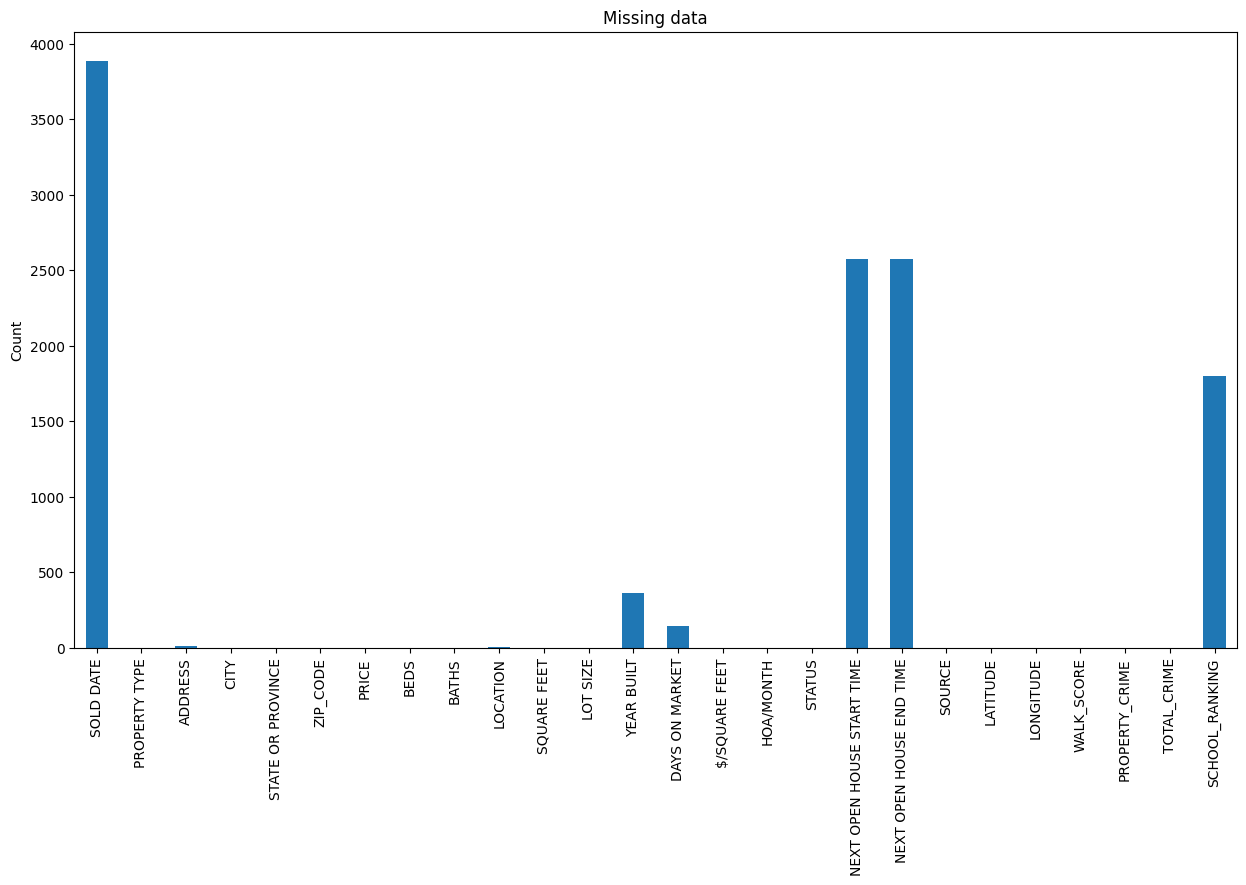

In [135]:
# Display NULL data value using heatmap
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

##Data Visualization

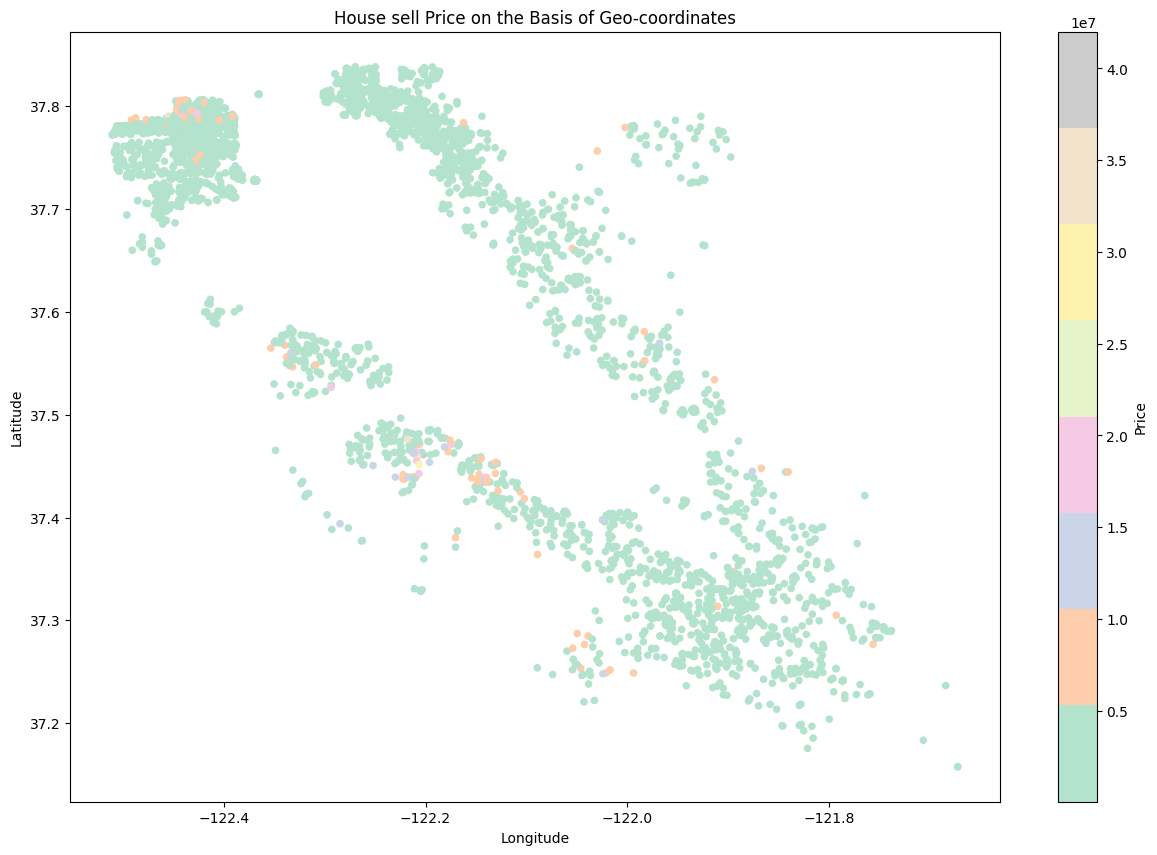

In [136]:
plt.figure(figsize=(15,10))
plt.scatter(data['LONGITUDE'], data['LATITUDE'], c=data['PRICE'].astype('float64'), cmap='Pastel2', s=20) # Adjust s (size) as needed
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House sell Price on the Basis of Geo-coordinates')
plt.show()

##Heat map for the dataset

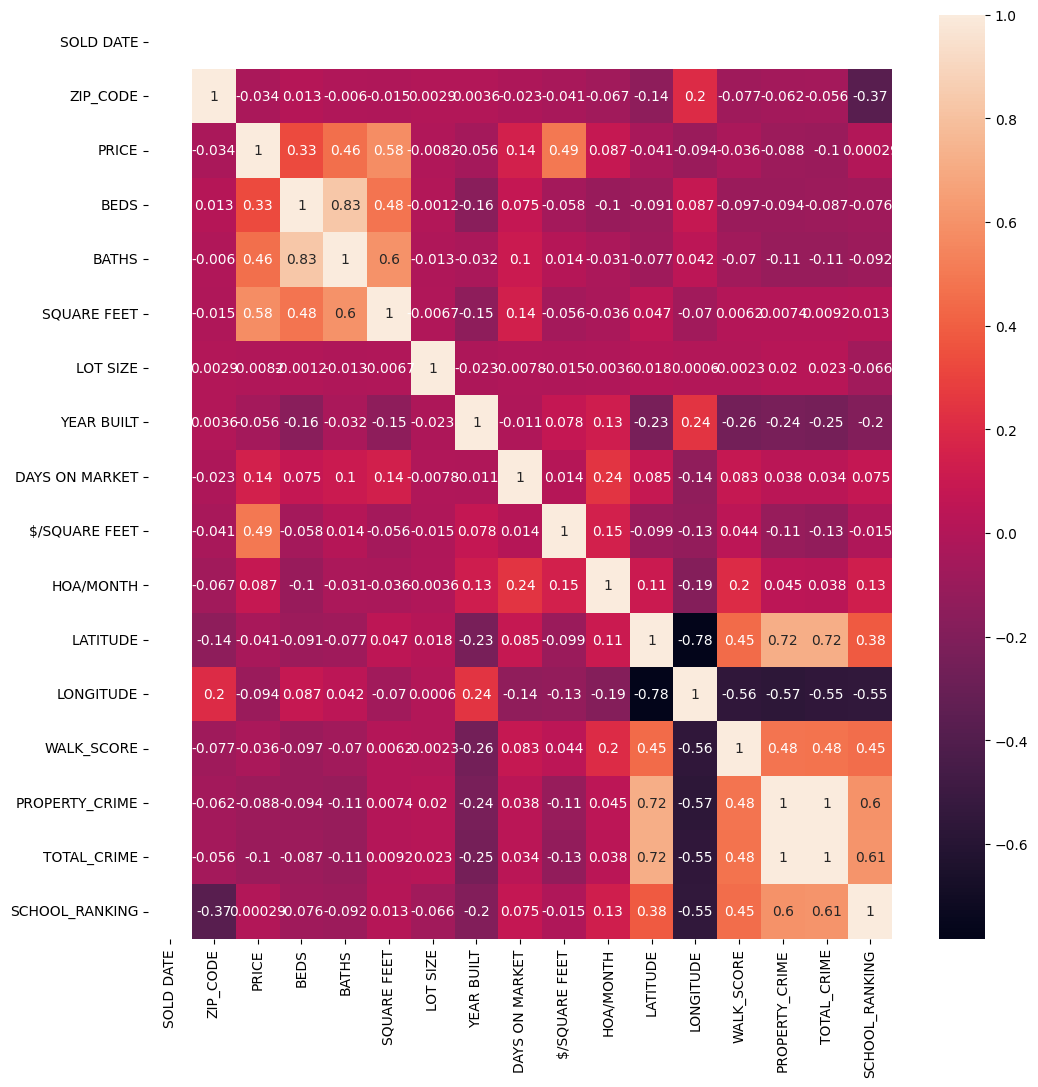

In [137]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

Checkin

The data.describe() function in pandas provides a summary of the statistical attributes of a dataset's numerical columns, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. It helps in understanding the central tendency, dispersion, and shape of the distribution of a dataset, offering a quick overview of the data's characteristics and potential patterns. This method is a convenient tool for initial data analysis before diving into more detailed data exploration and visualization

In [138]:
data = data[['LATITUDE', 'LONGITUDE', 'PROPERTY_CRIME']]
data.describe()

,LATITUDE,LONGITUDE,PROPERTY_CRIME
count,3886.000000,3886.000000,3886.000000
mean,37.620953,-122.197175,4171.646680
std,0.192845,0.211426,2073.223331
min,37.157717,-122.510444,658.000000
25%,37.439249,-122.409526,2420.000000
50%,37.727374,-122.220830,5506.000000
75%,37.781117,-121.998388,5506.000000
max,37.838245,-121.672645,21187.000000


In [139]:
df=data.dropna()

suppressing any warnings and standardizing your dataset using the StandardScaler from scikit-learn, which scales the data to have a mean of 0 and a standard deviation of 1. After scaling, we convert the data back to a pandas DataFrame and use the describe() method to generate a statistical summary, which includes metrics like mean, standard deviation, and percentiles. This summary, stored in data_s, helps in understanding the distribution of each feature after standardization, a common preprocessing step before applying machine learning algorithms

In [140]:

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1,2
count,3.886000e+03,3.886000e+03,3.886000e+03
mean,2.276077e-14,-2.713447e-15,-1.170220e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.402426e+00,-1.481886e+00,-1.694993e+00
25%,-9.423486e-01,-1.004502e+00,-8.449992e-01
50%,5.519215e-01,-1.118978e-01,6.436957e-01
75%,8.306401e-01,9.403386e-01,6.436957e-01
max,1.126919e+00,2.481229e+00,8.208254e+00


## **GMM Clustering**

### Silhouette score to find optimal number of clusters

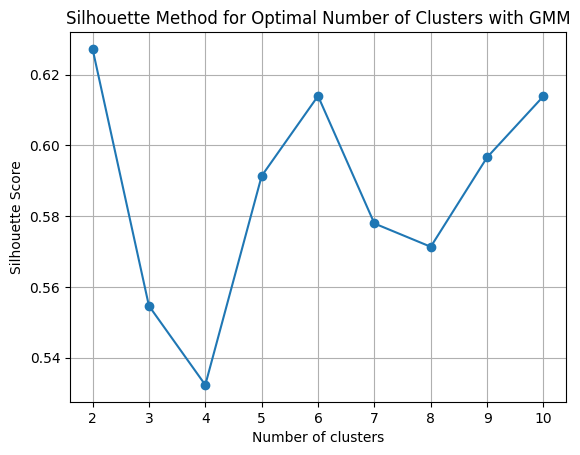

In [141]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming data_scaled is your data matrix
silhouette_avg = []
n_clusters_range = range(2, 11)  # Start from 2 as silhouette score is not defined for a single cluster

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0).fit(data_scaled)
    cluster_labels = gmm.predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure()
plt.plot(n_clusters_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters with GMM')
plt.grid(True)
plt.show()


In [142]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=0).fit(data_scaled)
labels = gmm.predict(data_scaled)
sil_score = silhouette_score(data_scaled, labels)
sil_score

0.5546257572616882

In [143]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [144]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance[0]), 2 * np.sqrt(covariance[1])

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)



In [145]:
from matplotlib.lines import Line2D

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    cluster_info = []
    unique_labels = np.unique(labels)
    cmap = plt.cm.get_cmap('viridis', len(unique_labels))

    if label:
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

        for i, label in enumerate(unique_labels):
            cluster_size = sum(labels == label)
            cluster_info.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}: {cluster_size} points', markersize=10, markerfacecolor=cmap(i / len(unique_labels))))

        for i, (pos, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
            if covar.shape == (2, 2):
                U, s, Vt = np.linalg.svd(covar)
                angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
                width, height = 2 * np.sqrt(s)
            else:
                angle = 0
                width, height = 2 * np.sqrt(covar[0]), 2 * np.sqrt(covar[1])

            draw_ellipse(pos, covar, alpha=0.2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    ax.axis('equal')

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    # Adding a legend with cluster information
    ax.legend(handles=cluster_info, loc='upper right')




I have taken cluster number as 3 here

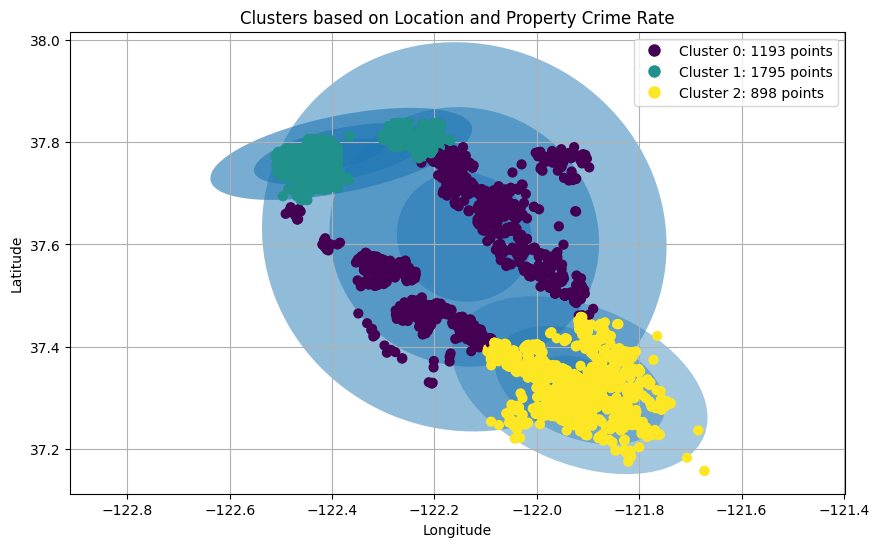

In [146]:
optimal_clusters = 3  # Replace with the optimal number found in step 3
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0).fit(data_scaled)
data['Cluster'] = gmm.predict(data_scaled)

# Extract the LONGITUDE and LATITUDE columns for plotting
X = data[['LONGITUDE', 'LATITUDE']].values

# Plot the GMM results
plt.figure(figsize=(10, 6))
plot_gmm(gmm, X)

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters based on Location and Property Crime Rate')
plt.grid(True)

# Show the plot
plt.show()


In [147]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

1    2078
2     932
0     876
Name: Cluster, dtype: int64


In [148]:
cluster_stats = data.groupby('Cluster')['PROPERTY_CRIME'].describe()
print(cluster_stats)

          count         mean          std     min     25%     50%     75%  \
Cluster                                                                     
0         876.0  2044.720320   663.902176   658.0  1536.0  1878.0  2285.0   
1        2078.0  5782.719923  1465.040136  1734.0  5506.0  5506.0  6421.0   
2         932.0  2578.703863   379.025238  1524.0  2420.0  2420.0  2549.0   

             max  
Cluster           
0         3863.0  
1        21187.0  
2         3620.0  


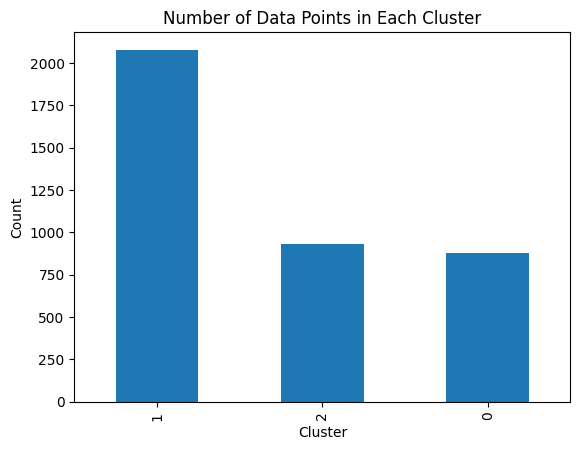

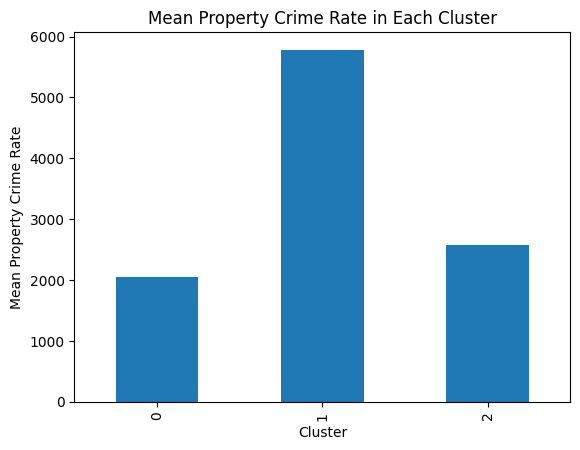

In [149]:
cluster_counts.plot(kind='bar')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plotting the mean property crime rate in each cluster
cluster_stats['mean'].plot(kind='bar')
plt.title('Mean Property Crime Rate in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Property Crime Rate')
plt.show()

**Clusterwise data distribution** <br>
We can infer from the above results that cluster 1 has highest number of property crime rate unfortunately marking it as the neighborhood with the highest crime rate. <br>
Cluster 0 has the lowest number of crime rates  making it a potentially safer and more desirable area for residence or investment.


#KMeans Clustering <br>


### Elbow Method to find  optimal number of clusters

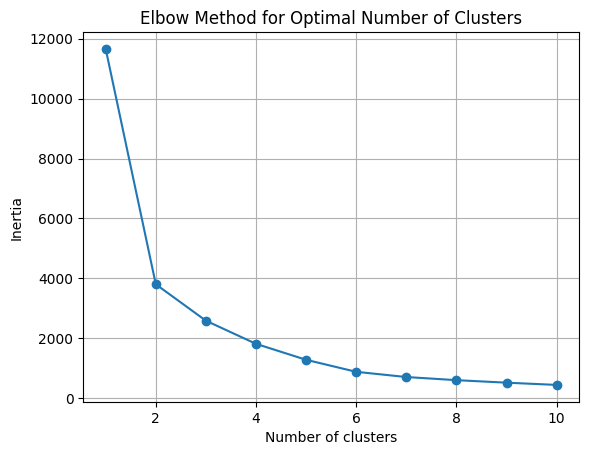

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data matrix
inertia = []
n_clusters_range = range(1, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure()
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


### Silhoutte score to find  optimal number of clusters

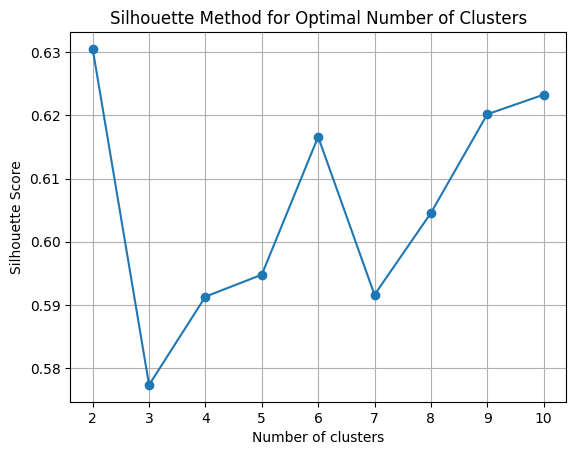

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming data_scaled is your data matrix
silhouette_avg = []
n_clusters_range = range(2, 11)  # Start from 2 as silhouette score is not defined for a single cluster

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure()
plt.plot(n_clusters_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


I have selected cluster as 3 here

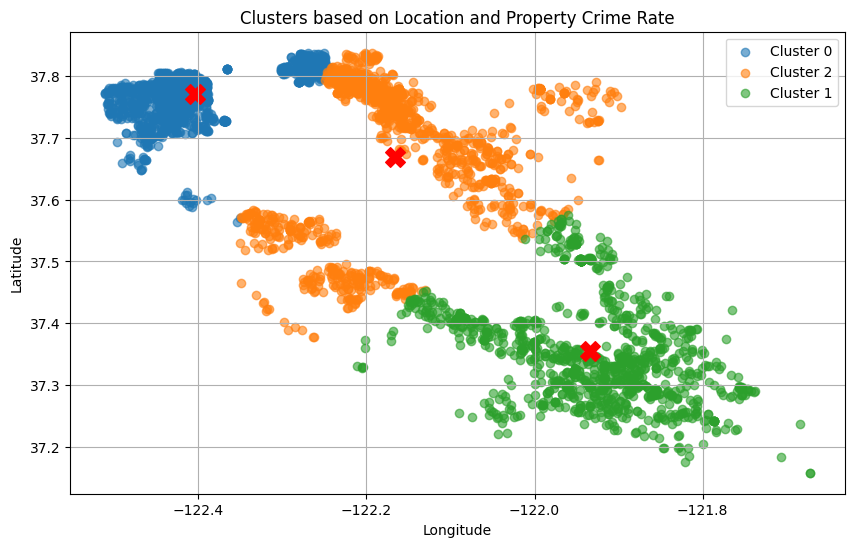

In [152]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming data is your data frame and it has been loaded already

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['LONGITUDE', 'LATITUDE']])  # Adjust the features as necessary

# Get the count of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for each cluster
clusters = data['Cluster'].unique()
for cluster in clusters:
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], label=f'Cluster {cluster}', alpha=0.6)

# Plot the centroids and annotate with the count of data points in each cluster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X')


# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters based on Location and Property Crime Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [153]:
cluster_counts = data['Cluster'].value_counts()
cluster_counts

0    1607
2    1165
1    1114
Name: Cluster, dtype: int64

#**Conclusion**

We can infer from the above clustering results that the properties are distinctly grouped based on their geographical location and property crime rates, which can serve as a significant indicator for potential homebuyers and investors.

From our analysis, it is evident that Cluster 0 houses the majority of the properties, unfortunately marking it as the neighborhood with the highest crime rate. This area might not be recommended for individuals looking for safer environments to reside in or invest.

On the other hand, Cluster 2 represents a neighborhood with a significantly lower crime rate, making it a potentially safer and more desirable area for residence or investment. It stands as a beacon of safety and tranquility amidst the other clusters.

Cluster 1, while having a slightly higher crime rate compared to Cluster 2, still maintains a relatively safe environment, positioning itself as a viable option for those willing to compromise slightly on safety for other benefits the neighborhood might offer.

Therefore, for individuals prioritizing safety in their home-buying or investment decisions, properties located within Cluster 2 would be the most recommended, followed by those in Cluster 1, while properties in Cluster 0 should perhaps be approached with caution.

##**Compare results of KMeans and GMM**

We can see number of oprimal clusters using Silhoutte method in both the clustering methods are same that is 3,  and so the results are accurate in finding the most safe neighborrhood with less crime and safest place to live. both the methods predicts the neighbourhood with the most crimes and less safe place for people to live or investors to invest.We can infer from the above clustering results that the properties are distinctly grouped based on their geographical location and property crime rates, which can serve as a significant indicator for potential homebuyers and investors.